In [1]:
#2) Salary_hike -> Build a prediction model for Salary_hike
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.shape

(30, 2)

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience'>

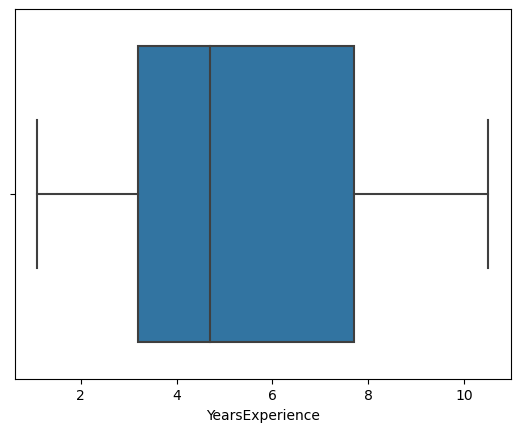

In [7]:
sns.boxplot(df['YearsExperience'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

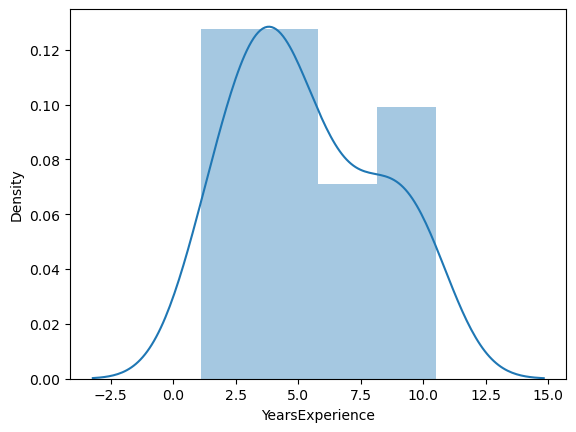

In [8]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary'>

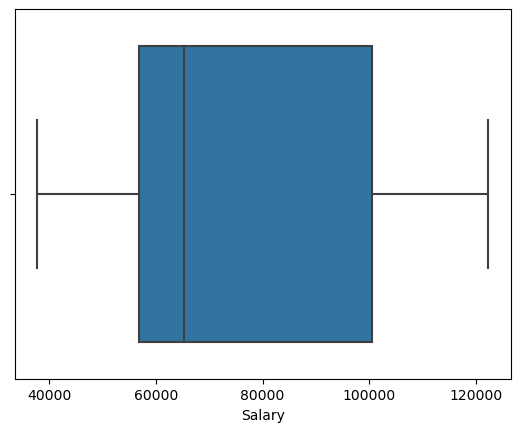

In [9]:
sns.boxplot(df['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

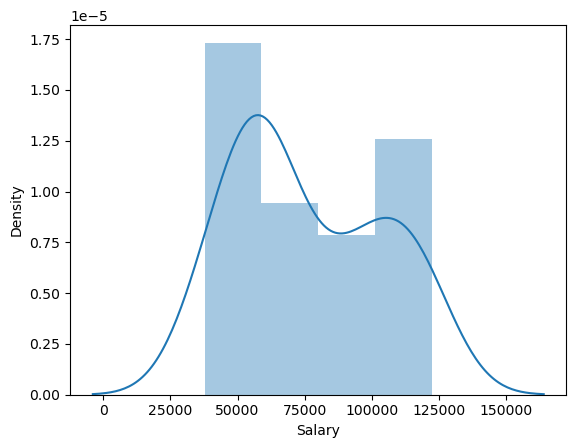

In [10]:
sns.distplot(df['Salary'])

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

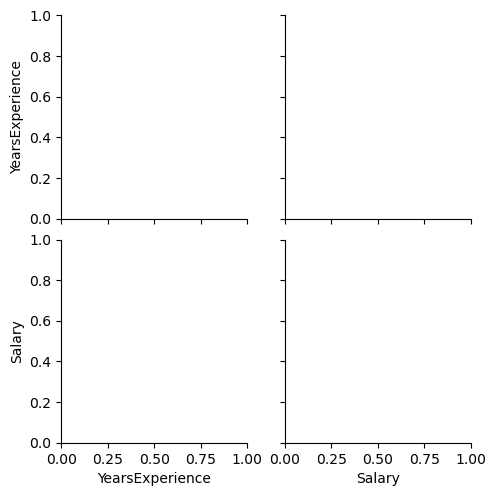

In [11]:
sns.pairplot(df)

In [ ]:
sns.distplot(df)

In [ ]:
df.corr()

<AxesSubplot:>

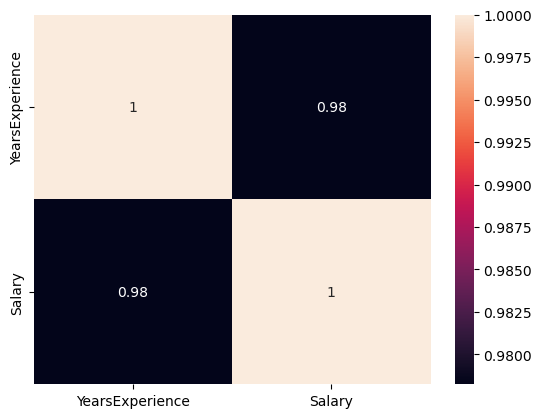

In [12]:
sns.heatmap(df.corr(), annot=True)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

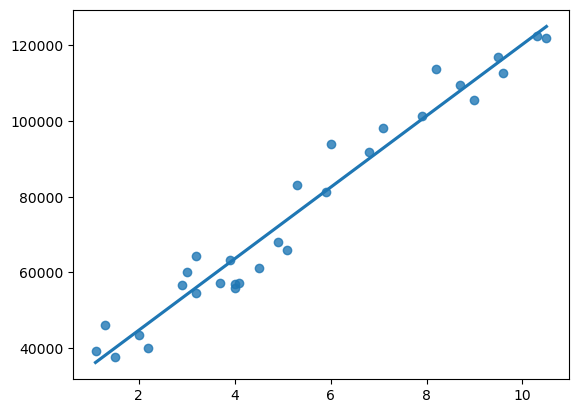

In [13]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

In [15]:
model=smf.ols('Salary~YearsExperience', data=df).fit()

In [26]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [33]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [34]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        13:58:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [37]:
new_data=pd.Series([4,5,2,7,8])
new_data

0    4
1    5
2    2
3    7
4    8
dtype: int64

In [38]:
data_pred=pd.DataFrame(new_data, columns=['YearsExperience'])

In [39]:
data_pred

,YearsExperience
0,4
1,5
2,2
3,7
4,8


In [40]:
model.predict(data_pred)

0     63592.049484
1     73042.011806
2     44692.124842
3     91941.936449
4    101391.898770
dtype: float64

In [43]:
model1=smf.ols('Salary~np.log(YearsExperience)', data=df).fit()

In [44]:
model1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [45]:
model1.pvalues

Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64

In [46]:
model1.tvalues

Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64

In [47]:
model1.rsquared, model1.rsquared_adj

(0.853888882875697, 0.8486706286926862)

In [49]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        14:06:20   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
model2=smf.ols('Salary~np.square(YearsExperience)',data=df).fit()

In [52]:
model2.params

Intercept                     48042.585515
np.square(YearsExperience)      776.318773
dtype: float64

In [53]:
model2.pvalues, model2.tvalues

(Intercept                     3.389190e-19
 np.square(YearsExperience)    1.518127e-16
 dtype: float64,
 Intercept                     21.973654
 np.square(YearsExperience)    17.397015
 dtype: float64)

In [54]:
model2.rsquared, model2.rsquared_adj

(0.9153198857852565, 0.9122955959918728)

In [56]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.52e-16
Time:                        14:11:38   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YearsExperience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
model3=smf.ols('Salary~np.sqrt(YearsExperience)',data=(df)).fit()

In [59]:
model3.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [60]:
model3.pvalues, model3.tvalues

(Intercept                   2.906965e-03
 np.sqrt(YearsExperience)    8.565358e-18
 dtype: float64,
 Intercept                   -3.262308
 np.sqrt(YearsExperience)    19.437148
 dtype: float64)

In [61]:
model3.rsquared, model3.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

In [63]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           8.57e-18
Time:                        14:14:38   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""